# IBM DATA SCIENCE CAPSTONE PROJECT - Battle of the Neighborhoods

## Aussie Pies in Toronto

by Andrew Huxham
__________________________

# INTRODUCTION

### PURPOSE

This analysis creates an initial market profile for a proposal to introduce a new product line of Australian meat pies into Canada. The City of Toronto has been selected as a potential starter location. 

Rather than compete with open another storefront, the proposed concept is to introduce a product line with a difference, the Australian meat pie. \
Ideally this will offer food retailers an additional sales opportunity while providing an agile, scalable market entry point for the new venture. 

This analysis will identify the range and frequencies of surrounding venues. 

Impulsive snackers and regular fans from the Land Down Under consider the simple, savoury meat pie a staple stomach filler or craving crusher. \
The typical pie is a hand sized pastry bowl and lid filled with a dollop of diced or minced meat and gravy. \
As well as the ever-popular plain pie, the convenient hand sized meal comes in a wide range of delicious combinations including \
peas and mash potato, chicken, curry, mushroom, cheese and bacon or onion. \
The super hungry can scale up with another pie or supplement with an equally healthy side dish such as deep-fried potato chips (fries). \
The venture anticipates that the delicacy from the land Down Under will carve out a cuisine niche among cosmopolitan Canadians with comparable taste traits. 

Despite confidence of wide appeal by Canadians for the Aussie dish, the difficulty breaking into a new market is not underestimated. \
This analysis will create an initial profile of venues around Toronto that may support the concept.

The analysis is preliminary in nature and is intended form a small but important part of any subsequent business case. 
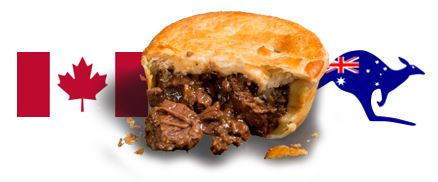

(images: flags from pixabay.com; pie from pngitem.com)


## DATA DESCRIPTIONS


### DATA SOURCES
##### Target neighborhoods: 
Toronto neighborhoods within scope of consideration will be sourced from Wikipedia (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M). \
The data will be structured into a hierarchy of information categories by Postal Code, Borough and Neighborhood.

- Borough: is a Canadian municipal subdivision of a major city, which is Toronto for the purpose of this analysis. 
- Neighborhoods: smaller communities that form part of the borough. 
- Postal Code: Mail delivery area associated with a borough or neighborhood.

Wikipedia is used for pragmatic, cost effective access but is not a primary or official record source. There are known inconsistences such as borough, neighborhood or both classified as ‘Not Assigned’. \
Treatment of these records is covered in the following section headed ‘Methodology’. 

##### Spatial data: 
Location data and venue categories with related geographical coordinates will be sourced from foursquare.com. 
The information categories utilised are: 
- Venues: Categorical records of venues domiciled within respective neighborhoods will be imported, providing indications of popularity within neighborhoods  
- Spatial data: Correlated latitude and longitude coordinates will be imported to provide visual analysis of the venues and neighborhoods within scope. 

#### DATA SOLUTION
Target neighbourhood information imported from Wikipedia will be expanded by joining with records from Foursquare, joined on common neighborhoods. 
Application of the resulting dataset is intended to provide the following solutions: 

- Database: Structured information set that defines the scope of information evaluated as part of this initial analysis.
- Classification: Numerical conversions will enable mathematical classification calculations from venue categorical records
- Clusters: Consistent themes, classification clusters and outliers will be identified from the sample data. 
- Constraints: The intent of analysis is an initial sample profile, so venue information will be limited to 100 records within a 500 metre radius. 
- Visualisation: Additional context will be provided by generating visualisation of spatial proximity and classification clusters. 


# METHODOLOGY - PEFORMING THE ANALYSIS


Useful terminology references:
- dataframe (df) = a data structure arranged in a table format of rows of records grouped into columns
- source: denotes access to source data 
- head(): default data sample of the top five rows by columns, adjustable by inserting specific number of rows to be sampled between '()'
- print.shape: confirms count of rows by columns

### CREATE BASE DATAFRAME OF TARGET NEIGHBORHOODS

The scope of neighborhoods to be included in the analysis is created first. 
The steps for creating the data frame will take two phases:

#### Create: Form the initial dataframe from the source data
1.	Import libraries
2.	Access the source data from Wikipedia (df_pcodes)
3.	Check characteristics

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
4.	Adjust spelling of 'Postal Code'
5.	Convert 'Not assigned = NaN' in the column 'Borough'
6.  Drop rows with a value of 'NaN' in the column 'Borough'
7.  Group by PostalCode

In [1]:
#1. Import libraries

import requests
import pandas as pd
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np # library to handle data in a vectorized manner
print('Libraries imported.')

Libraries imported.


In [2]:
# 2.Access the source data from Wikipedia

source_pcodes = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_source_pcodes = pd.read_html(source_pcodes, header=0)
df_pcodes = df_source_pcodes[0]

# 3.Check characteristics 

#check the data frame shape or count of rows by columns
print('Shape of rows by columns:', df_pcodes.shape)

#Display a small sample of the dataframe to check it is as intended
df_pcodes.head(10)

Shape of rows by columns: (180, 3)


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [3]:
# 4.Adjust spelling of 'Postal Code'
df_pcodes.rename(columns={"Postal Code": "PostalCode"}, inplace = True)

# 4.Adjust spelling of 'Not Assigned' in the column 'Borough'
df_pcodes.Borough.replace("Not assigned", np.nan, inplace = True)

#Check changes occurred
df_pcodes.head()

,PostalCode,Borough,Neighborhood
0,M1A,NaN,Not assigned
1,M2A,NaN,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# 6. Drop rows with a value of 'NaN' in the column 'Borough' 

df_pcodes.dropna(axis=0, inplace=True)
df_pcodes = df_pcodes.reset_index()
df_pcodes = df_pcodes.drop(['index'], axis=1)

#Check rows after changes 
print('Shape of rows by columns:', df_pcodes.shape)

Shape of rows by columns: (103, 3)


In [5]:
# 7. Group by PostalCode

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df_NHood_NotAssigned = df_pcodes.loc[df_pcodes['Neighborhood'] == 'Not assigned']

# Group 
df_pcodes = df_pcodes.groupby("PostalCode", as_index = False).agg(lambda x: ", ".join(sorted(set(x))))

#Check rows after changes 
print('Shape of rows by columns:', df_pcodes.shape)

Shape of rows by columns: (103, 3)


### ADD DATAFRAME OF SPATIAL COORDINATES

The steps for creating the data frame will take two phases:

#### Create: Form the initial dataframe from the source data
1.	Create a dataframe GIS data sourced from Cognitive Labs as the source (df_gis)

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
2.  Adjust spelling of 'Postal Code' from the GIS data to match the target neighborhoods (df_pcodes)
3.  Merge with (df_pcodes)
4.  Drop duplicate records

In [6]:
#1.  Access the GIS data sourced from Cognitive Labs
source_gis = pd.read_csv('http://cocl.us/Geospatial_data')
df_gis = source_gis

#Check rows after changes 
print('Shape of rows by columns:', df_gis.shape)
df_gis.head()

Shape of rows by columns: (103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#2.  Adjust spelling of 'Postal Code' from the GIS data to match the target neighborhoods (df_pcodes)
df_gis.rename(columns={"Postal Code": "PostalCode"}, inplace = True)

#3.  Merge with (df_pcodes)
df_pcodes_gis = pd.merge(df_gis, df_pcodes, on = 'PostalCode')

#4.  Drop duplicate records
df_pcodes_gis.drop_duplicates(keep=False,inplace=True) 

#Check rows after changes 
print('Shape of rows by columns:', df_pcodes_gis.shape)
df_pcodes_gis.head()

Shape of rows by columns: (103, 5)


,PostalCode,Latitude,Longitude,Borough,Neighborhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


### ANALYSIS - CLUSTER TARGET NEIGHBORHOODS ON A MAP

The spatial coordinates added to the target neighborhoods will be used to visualise proximity or cluster context. 

The steps for clustering the neighborhoods on a map will be:

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
1. Import additional libaries required
2. Set coordinate definitions for 'Toronto, CANADA'
3. Define map using latitude and longitude values
4. Create markers to overlay the map

#### Analysis: generate map for visual analysis
5. Generate the map (map_toronto)

Notes on map functionality: 
- Scroll to zoom in and out
- Hover on cirles to identify associated neighborhoods.

In [8]:
#1. Import additional libaries required
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 8.3MB/s ta 0:00:011
Libraries imported.


In [9]:
#2. Set coordinate definitions for 'Toronto, CANADA'
address = 'Toronto, CANADA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [10]:
#3. Define map using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

#4. Create markers to overlay the map
for lat, lng, borough, neighborhood in zip(df_pcodes_gis['Latitude'], df_pcodes_gis['Longitude'], df_pcodes_gis['Borough'], df_pcodes_gis['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

#5. Generate the map (map_toronto)
map_toronto

Notes on map functionality: 
- Scroll to zoom in and out
- Hover on cirles to identify associated neighborhoods.

### ANALYSIS - REFINE TO NEIGHBORHOODS CONTAINING 'TORONTO'

In this section the data is refined further to hone perspective.

The following steps will be applied:

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
1. Filter for 'Borough' containing 'Toronto'
2. Access geospatial records from Foursquare 
3. Set parameters to 100 venues within 500 metres of a neighborhood
4. Source nearby venues

#### Analysis: Generate a list of venues for analysis
5. Identify nearby venues

In [11]:
#1. Filter for 'Borough' containing 'Toronto'
toronto_data = df_pcodes_gis[df_pcodes_gis['Borough'].str.contains("Toronto")]

#Check tuple after changes 
print('Shape of rows by columns:', toronto_data.shape)
toronto_data

Shape of rows by columns: (39, 5)


,PostalCode,Latitude,Longitude,Borough,Neighborhood
37,M4E,43.676357,-79.293031,East Toronto,The Beaches
41,M4K,43.679557,-79.352188,East Toronto,"The Danforth West, Riverdale"
42,M4L,43.668999,-79.315572,East Toronto,"India Bazaar, The Beaches West"
43,M4M,43.659526,-79.340923,East Toronto,Studio District
44,M4N,43.728020,-79.388790,Central Toronto,Lawrence Park
45,M4P,43.712751,-79.390197,Central Toronto,Davisville North
46,M4R,43.715383,-79.405678,Central Toronto,"North Toronto West, Lawrence Park"
47,M4S,43.704324,-79.388790,Central Toronto,Davisville
48,M4T,43.689574,-79.383160,Central Toronto,"Moore Park, Summerhill East"
49,M4V,43.686412,-79.400049,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."


In [12]:
#2. Access geospatial records from Foursquare

CLIENT_ID = 'OP1PB4OWHTCTUAHWKWILQH52LNBC4SDLTC5ID43VAHBNH0RZ' # your Foursquare ID
CLIENT_SECRET = 'DXP1J1IT3BGZT3HMKWBZMBACCF0ESKBTXS2OKVDX4EDPCVKI' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: OP1PB4OWHTCTUAHWKWILQH52LNBC4SDLTC5ID43VAHBNH0RZ
CLIENT_SECRET:DXP1J1IT3BGZT3HMKWBZMBACCF0ESKBTXS2OKVDX4EDPCVKI


In [13]:
#3. Set parameters to 100 venues within 500 metres of a neighborhood

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OP1PB4OWHTCTUAHWKWILQH52LNBC4SDLTC5ID43VAHBNH0RZ&client_secret=DXP1J1IT3BGZT3HMKWBZMBACCF0ESKBTXS2OKVDX4EDPCVKI&v=20200605&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [14]:
#4. Source nearby venues
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
#5. Identify nearby venues (simple list)
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [16]:
#5. Identify nearby venues (identify the quantity of venues but limit display to the first five rows)
toronto_venues["Venue Category"].replace({"Coffee Shop": "Coffee_Shop"}, inplace=True)
print('Shape of rows by columns:', toronto_venues.shape)
toronto_venues.head()

Shape of rows by columns: (1614, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Seaspray Restaurant,43.678888,-79.298167,Asian Restaurant


### ANALYSIS - QUANTIFY VENUES BY CATEGORY'

In this section the data is refined further to hone perspective.

The following steps will be applied:

#### Analysis: Quantify venues
1. Quantify total unique venue categories
2. Quantify individual venue categories
3. Quantify the frequency of venue categories


In [17]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 unique categories.


In [18]:
toronto_venues_count = toronto_venues.groupby('Venue Category').count()
#toronto_venues_group = toronto_venues.groupby("Venue Category", as_index = False).agg(lambda x: ", ".join(sorted(set(x))))
toronto_venues_count = toronto_venues_count[['Neighborhood']]
toronto_venues_count.sort_values('Neighborhood', ascending=False)

,Neighborhood
Venue Category,
Coffee_Shop,143
Café,89
Restaurant,54
Italian Restaurant,41
Hotel,37
Park,34
Bakery,33
Japanese Restaurant,33
Pizza Place,30


In [19]:
toronto_venues_count['Neighborhood'].describe()

count    233.000000
mean       6.927039
std       13.058515
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max      143.000000
Name: Neighborhood, dtype: float64

### ANALYSIS - REPORT MOST COMMON VENUES 

In this section will undertake a numeric conversion categorical data in Venue Categories. 

The conversion will enable mathematical classification calculations, which will be used to determine frequency of various categories. 

The following steps will be applied:

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
1. Utilise functionality 'one hot encoding' to provide numeric values to Venue Categories
2. Group the data by neighborhood
4. Rearrange columns according to number of top 10 venues, grouped on Neighborhood (multiple parts)

#### Analysis: generate reprts for review
3. Generate report of five most common venue categories for each location, in order of frequency
5. Generate report on number of top 10 venues, grouped on Neighborhood

#### Analyse nearby venues

1. identify unique venue categories
2. convert categorical attributes to numeric for further analysis
3. Generate a list of the top 5 most frequented venues by neighborhood
4. Create a new dataframe of most common venues by neighborhood


In [20]:
#1. Utilise functionality 'one hot encoding' to provide numeric values to Venue Categories

toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# check data shape
toronto_onehot.shape

(1614, 233)

In [21]:
#2. Group the data by neighborhood

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

#check output
print('Shape of rows by columns:', toronto_grouped.shape)
toronto_grouped.head()

Shape of rows by columns: (39, 233)


,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee_Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.017241,0.000000,0.0,0.0,0.0,0.000000,0.017241,0.0,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.000000,0.0,0.000000,0.0,0.017241,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.034483,0.0,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.000000,0.017241,0.051724,0.086207,0.0,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.000000,0.017241,0.0,0.0,0.0,0.000000,0.017241,0.000000,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.0,0.017241,0.017241,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,

In [22]:
#3. Generate report of five most common venue categories for each location, in order of frequency

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee_Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.03
3         Cheese Shop  0.03
4          Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.14
1  Breakfast Spot  0.09
2     Coffee_Shop  0.09
3       Pet Store  0.05
4    Intersection  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0    Light Rail Station  0.11
1  Gym / Fitness Center  0.05
2         Auto Workshop  0.05
3            Smoke Shop  0.05
4                  Park  0.05


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.20
1    Airport Lounge  0.13
2       Coffee_Shop  0.07
3   Harbor / Marina  0.07
4  Sculpture Garden  0.07


----Central Bay Street----
                 venue  freq
0      

In [23]:
#4. Rearrange columns according to number of top 10 venues (part 1 - sort row categories)

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
#4. Rearrange columns according to number of top 10 venues (part 2 - create new dataframe sorted by neighborhood venue)

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
    
#5. Generate report on number of top 10 venues, grouped on Neighborhood
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee_Shop,Cocktail Bar,Seafood Restaurant,Café,Bakery,Beer Bar,Cheese Shop,Restaurant,Basketball Stadium,Beach
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee_Shop,Breakfast Spot,Gym,Bakery,Convenience Store,Performing Arts Venue,Pet Store,Climbing Gym,Restaurant
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Park,Auto Workshop,Comic Shop,Pizza Place,Recording Studio,Butcher,Restaurant,Burrito Place,Brewery
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Sculpture Garden,Airport,Airport Food Court,Airport Terminal,Harbor / Marina,Boutique,Bar,Boat or Ferry
4,Central Bay Street,Coffee_Shop,Italian Restaurant,Sandwich Place,Japanese Restaurant,Café,Salad Place,Thai Restaurant,Department Store,Bar,Burger Joint
5,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Restaurant,Baby Store,Candy Store,Nightclub
6,Church and Wellesley,Coffee_Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Smoke Shop,Men's Store,Mediterranean Restaurant,Bubble Tea Shop,Pub
7,"Commerce Court, Victoria Hotel",Coffee_Shop,Restaurant,Café,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Gastropub
8,Davisville,Pizza Place,Sandwich Place,Dessert Shop,Gym,Café,Italian Restaurant,Coffee_Shop,Sushi Restaurant,Park,Indoor Play Area
9,Davisville North,Gym,Sandwich Place,Park,Gym / Fitness Center,Breakfast Spot,Hotel,Department Store,Food & Drink Shop,Diner,Discount Store


#### Cluster neighborhoods - identify patterns of most common venues

1. define the clusters based upon most common venue category
2. generate a visual listing of the venues
3. create a visual of the clusters superimposed on the map of Toronto
4. summarise the clusters


### ANALYSIS - CLUSTER COMMON VENUES 

In this section will use the numeric conversions undertaken to generate analysis of clusters by venue category. 

The following steps will be applied:

#### Prepare: Clean and wrangle the data so that it is transformed into a useful state
1. Apply the function KMeans to define clusters
2. Apply clustering labels
3. Merge latitude/longitude for each neighborhood
4. Assign colours to clusters to be overlay the subsequent map. 

#### Analysis: generate reprts for review
5. Create coloured clusters of most common venue, overlaying the map of Toronto
6. Summarise the four cluster groups as separate reports


In [25]:
#1. Apply the function KMeans to define clusters

# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 7], dtype=int32)

In [26]:
#2. Apply clustering labels

#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) # This tends to be very temperamental - toggle on and off depending on error message 

toronto_merged = toronto_data
#toronto_merged.rename(columns={"Neighbourhood": "Neighborhood"}, inplace = True) #redundant but leaving just in case

#3. Merge latitude/longitude for each neighborhood
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [27]:
#4. Assign colours to clusters to be overlay the subsequent map. 
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

#5. Create coloured clusters of most common venue, overlaying the map of Toronto
map_clusters

In [28]:
#6. Summarise the four cluster groups as separate reports

In [29]:
Toronto_Cluster0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster0.shape)
Toronto_Cluster0

(3, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
75,43.669542,0,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Restaurant,Baby Store,Candy Store,Nightclub
76,43.669005,0,Pharmacy,Bakery,Supermarket,Café,Grocery Store,Brewery,Bank,Park,Music Venue,Bar
82,43.661608,0,Grocery Store,Café,Mexican Restaurant,Thai Restaurant,Diner,Fast Food Restaurant,Italian Restaurant,Fried Chicken Joint,Cajun / Creole Restaurant,Furniture / Home Store


In [30]:
Toronto_Cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster1.shape)
Toronto_Cluster1

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,43.689574,1,Park,Women's Store,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [31]:
Toronto_Cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster2.shape)
Toronto_Cluster2

(28, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,43.679557,2,Greek Restaurant,Coffee_Shop,Italian Restaurant,Bookstore,Ice Cream Shop,Restaurant,Furniture / Home Store,Liquor Store,Spa,Japanese Restaurant
42,43.668999,2,Sandwich Place,Park,Fast Food Restaurant,Pizza Place,Gym,Food & Drink Shop,Liquor Store,Burrito Place,Restaurant,Italian Restaurant
43,43.659526,2,Café,Coffee_Shop,Bakery,Gastropub,American Restaurant,Brewery,Yoga Studio,Latin American Restaurant,Food,Ice Cream Shop
46,43.715383,2,Coffee_Shop,Clothing Store,Yoga Studio,Sporting Goods Shop,Health & Beauty Service,Italian Restaurant,Fast Food Restaurant,Diner,Mexican Restaurant,Chinese Restaurant
47,43.704324,2,Pizza Place,Sandwich Place,Dessert Shop,Gym,Café,Italian Restaurant,Coffee_Shop,Sushi Restaurant,Park,Indoor Play Area
49,43.686412,2,Pub,Coffee_Shop,Bagel Shop,Sushi Restaurant,Bank,Sports Bar,Fried Chicken Joint,Restaurant,Pizza Place,Supermarket
51,43.667967,2,Bakery,Coffee_Shop,Pizza Place,Italian Restaurant,Café,Pub,Restaurant,Gift Shop,Pet Store,Indian Restaurant
52,43.665860,2,Coffee_Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Smoke Shop,Men's Store,Mediterranean Restaurant,Bubble Tea Shop,Pub
53,43.654260,2,Coffee_Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Cosmetics Shop,Shoe Store,Restaurant
54,43.657162,2,Clothing Store,Coffee_Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Lingerie Store,Tea Room,Pizza Place


In [32]:
Toronto_Cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster3.shape)
Toronto_Cluster3

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,43.679563,3,Park,Playground,Trail,Dance Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [33]:
Toronto_Cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster4.shape)
Toronto_Cluster4

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,43.676357,4,Asian Restaurant,Health Food Store,Pub,Trail,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant


In [34]:
Toronto_Cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster5.shape)
Toronto_Cluster5

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,43.72802,5,Park,Swim School,Bus Line,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [35]:
Toronto_Cluster6 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster6.shape)
Toronto_Cluster6

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,43.711695,6,Pool,Home Service,Garden,Women's Store,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


In [36]:
Toronto_Cluster7 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster7.shape)
Toronto_Cluster7

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,43.712751,7,Gym,Sandwich Place,Park,Gym / Fitness Center,Breakfast Spot,Hotel,Department Store,Food & Drink Shop,Diner,Discount Store


In [37]:
Toronto_Cluster8 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster8.shape)
Toronto_Cluster8

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,43.64896,8,Breakfast Spot,Gift Shop,Dessert Shop,Movie Theater,Eastern European Restaurant,Dog Run,Italian Restaurant,Bar,Bank,Restaurant


In [38]:
Toronto_Cluster9 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
print(Toronto_Cluster9.shape)
Toronto_Cluster9

(1, 12)


,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,43.696948,9,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Women's Store,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


In [39]:
print('Cluster 0:', Toronto_Cluster0.shape)
print('Cluster 1:', Toronto_Cluster1.shape)
print('Cluster 2:', Toronto_Cluster2.shape)
print('Cluster 3:', Toronto_Cluster3.shape)
print('Cluster 4:', Toronto_Cluster4.shape)
print('Cluster 5:', Toronto_Cluster5.shape)
print('Cluster 6:', Toronto_Cluster6.shape)
print('Cluster 7:', Toronto_Cluster7.shape)
print('Cluster 8:', Toronto_Cluster8.shape)
print('Cluster 9:', Toronto_Cluster9.shape)

Cluster 0: (3, 12)
Cluster 1: (1, 12)
Cluster 2: (28, 12)
Cluster 3: (1, 12)
Cluster 4: (1, 12)
Cluster 5: (1, 12)
Cluster 6: (1, 12)
Cluster 7: (1, 12)
Cluster 8: (1, 12)
Cluster 9: (1, 12)
